## Deep Neural Network Sequential Model On Fashion MNIST Dataset

#### About The Dataset

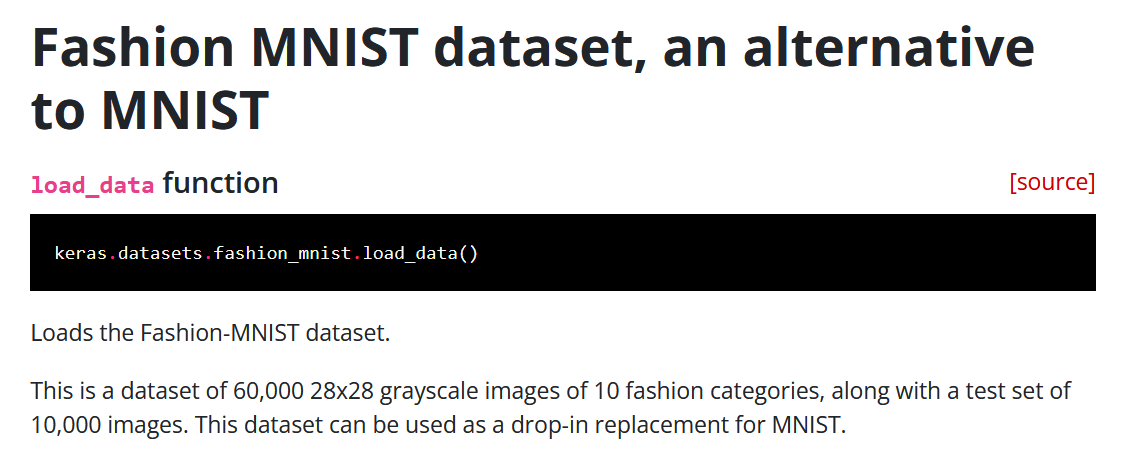

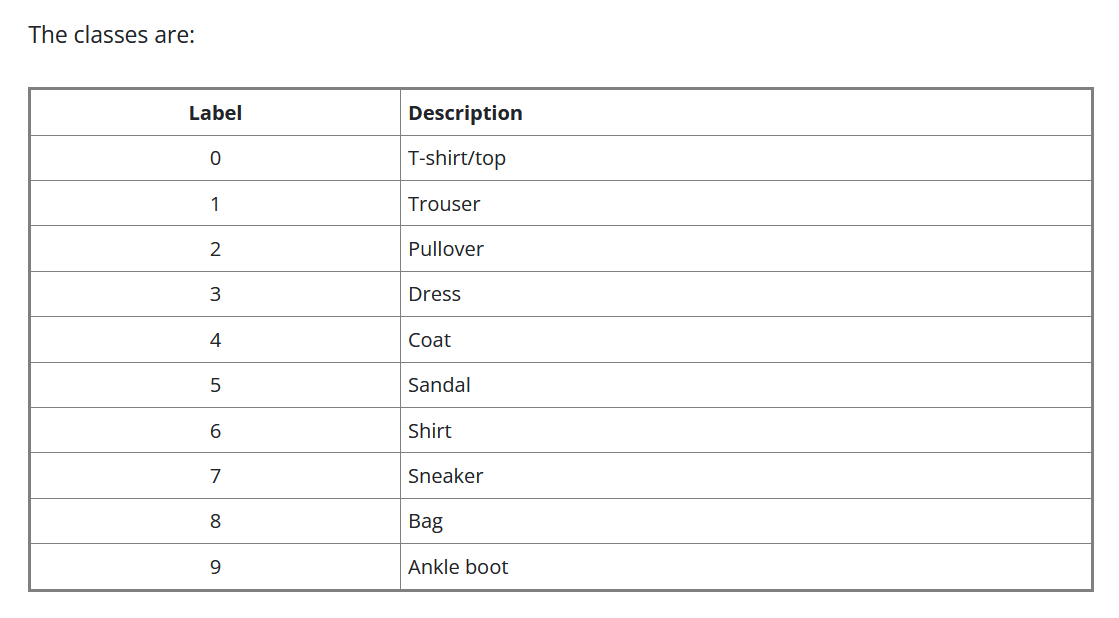

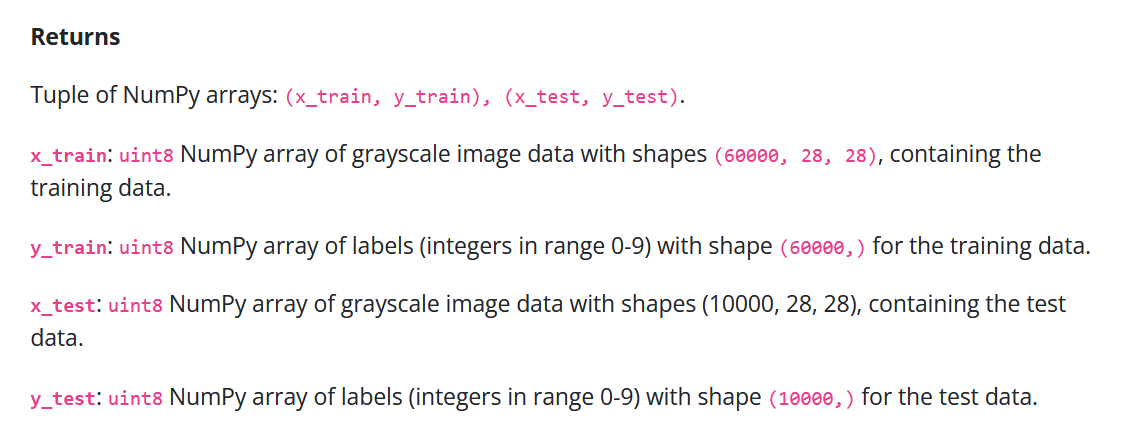

#### Import Basic Packages

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense , Dropout , Flatten
from keras import Sequential
from keras.datasets import fashion_mnist
import time
import warnings
warnings.filterwarnings('ignore')

#### Import The Dataset From Keras (Its Inbuilt)

In [2]:
(x_train , y_train) , (x_test , y_test) = fashion_mnist.load_data()

#### Shape

In [3]:
x_train.shape

(60000, 28, 28)

##### Insights : Feature data contains 60000 images and pixel value of image is 28 * 28

#### Reshape The Dataset

##### Independent Variable

In [4]:
x_train = x_train.reshape(x_train.shape[0] , 28 , 28 , 1)
x_test = x_test.reshape(x_test.shape[0] , 28 ,28 , 1)

#### Insights : In features variable  , we just make reshape of channel means we just make whole input data in one channel.
#### One channel because its gray scale . If RGB then three channels
#### We have already data in (60000 , 28 , 28) here we just make (60000 , 28 , 28 , 1)

##### Dependent variable

In [5]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

#### The keras.utils.to_categorical function converts these labels from their original format (usually integers) into a one-hot encoded format.(categorical). 
#### Actually y is category (classification) but in dataset its give as numbers so it make converts number to categorical

#### Feature Scaling

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

#### In image dataset , we always doing feature scaling by normalization only
#### Because image exist between 0 to 255 . so when 0 / 255 is 0 and 255 / 255 then 1 only. so data exist between 0 to 1 only

### building  model

In [7]:
def Sequential_model(optimizers):
    
    model = Sequential()
    
    # Make Dimension of Data from 3D to 1D
    
    model.add(Flatten())

    # Fully connected 1st hidden layer
    
    model.add(Dense(units = 256 , activation = 'relu' , input_dim = (28 , 28 , 1)))
    
    model.add(Dropout(0.25))
    
    # Fully connected 2nd hidden layer
    
    model.add(Dense(units = 128 , activation = 'relu'))
    
    model.add(Dropout(0.25))
    
    # Fully connected 3rd hidden layer
    
    model.add(Dense(units = 64 , activation = 'relu'))
    
    model.add(Dropout(0.25))
    
    # Output layer
    
    model.add(Dense(units = 10 , activation = 'softmax'))
    
    # Compile the model
    
    model.compile(optimizer = optimizers , loss = keras.losses.categorical_crossentropy , metrics = ['accuracy'])
    
    return model

In [8]:
optimizers_list = ['SGD' , 'Adagrad' , 'Adadelta' , 'RMSprop' , 'Adam']

In [9]:
for opti in optimizers_list:
    
    DNN = Sequential_model(opti)
    
    start = time.time()
    
    #train the model
    history = DNN.fit(x_train , y_train , validation_data = (x_test , y_test) , epochs = 10 , verbose = 1 , batch_size = 64)
    
    print('*' * 100)
    
    print('{0} optimizer take {1} time'.format(opti ,time.time() - start))
    
    print('*' * 100)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.4199 - loss: 1.6172 - val_accuracy: 0.7518 - val_loss: 0.6867
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.7228 - loss: 0.7945 - val_accuracy: 0.8005 - val_loss: 0.5681
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7716 - loss: 0.6546 - val_accuracy: 0.8202 - val_loss: 0.5106
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7964 - loss: 0.5895 - val_accuracy: 0.8256 - val_loss: 0.4836
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 0.8103 - loss: 0.5486 - val_accuracy: 0.8331 - val_loss: 0.4643
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8224 - loss: 0.5121 - val_accuracy: 0.8385 - val_loss: 0.4442
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 0.8287 - loss: 0.4971 - val_accuracy: 0.8414 - val_loss: 0.4342
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8329 - loss: 0.4739 - val_a

##### Performances of multiple optimizers :

##### Adam  :  accuracy: 0.8871 - loss: 0.3154 - val_accuracy: 0.8799 - val_loss: 0.3385
##### RMSprop :  accuracy: 0.8754 - loss: 0.3741 - val_accuracy: 0.8608 - val_loss: 0.4088
##### Adadelta :   accuracy: 0.4378 - loss: 1.7314 - val_accuracy: 0.6191 - val_loss: 1.4971
##### Adagrad :   accuracy: 0.7564 - loss: 0.7097 - val_accuracy: 0.7946 - val_loss: 0.5773
##### SGD :   accuracy: 0.8386 - loss: 0.4586 - val_accuracy: 0.8509 - val_loss: 0.4096

##### Time of multiple optimizers : 

##### Adam optimizer take 172.51900959014893 time 
#####  RMSprop optimizer take 166.85971188545227 time
#####  Adadelta optimizer take 191.86563754081726 time
##### Adagrad optimizer take 209.66920161247253 time
##### SGD optimizer take 176.92706871032715 time

#### Inights : According to overall conclusion Adam is the best optimizer